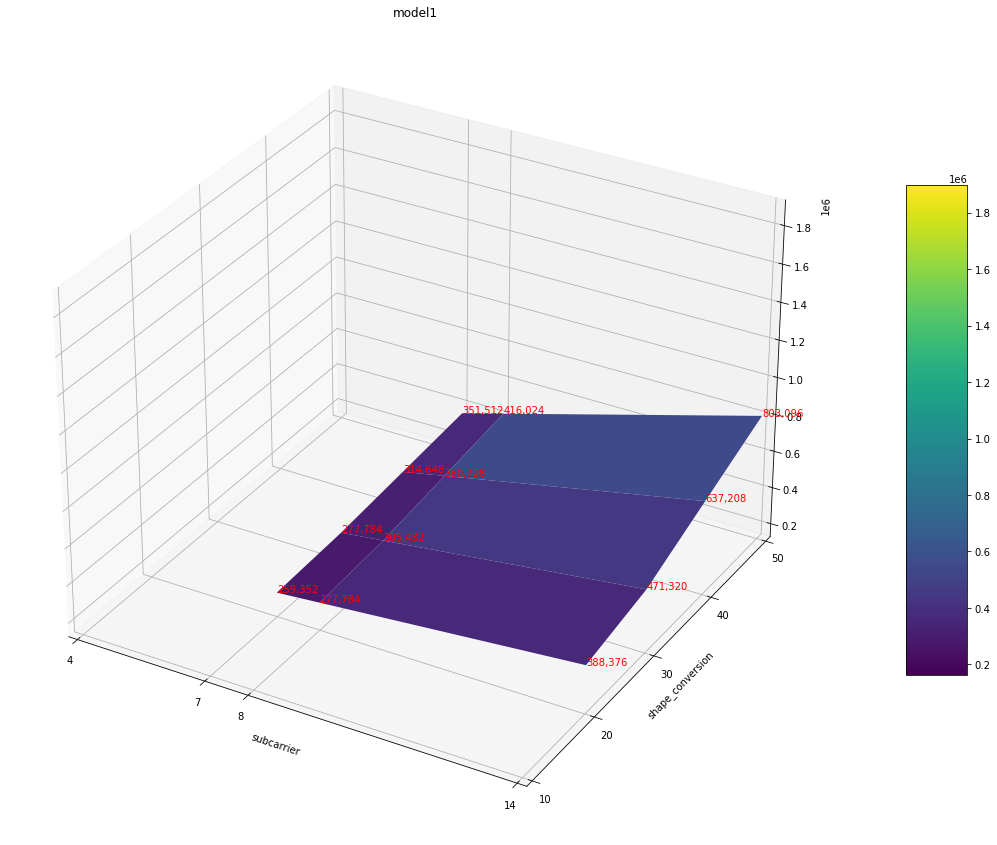

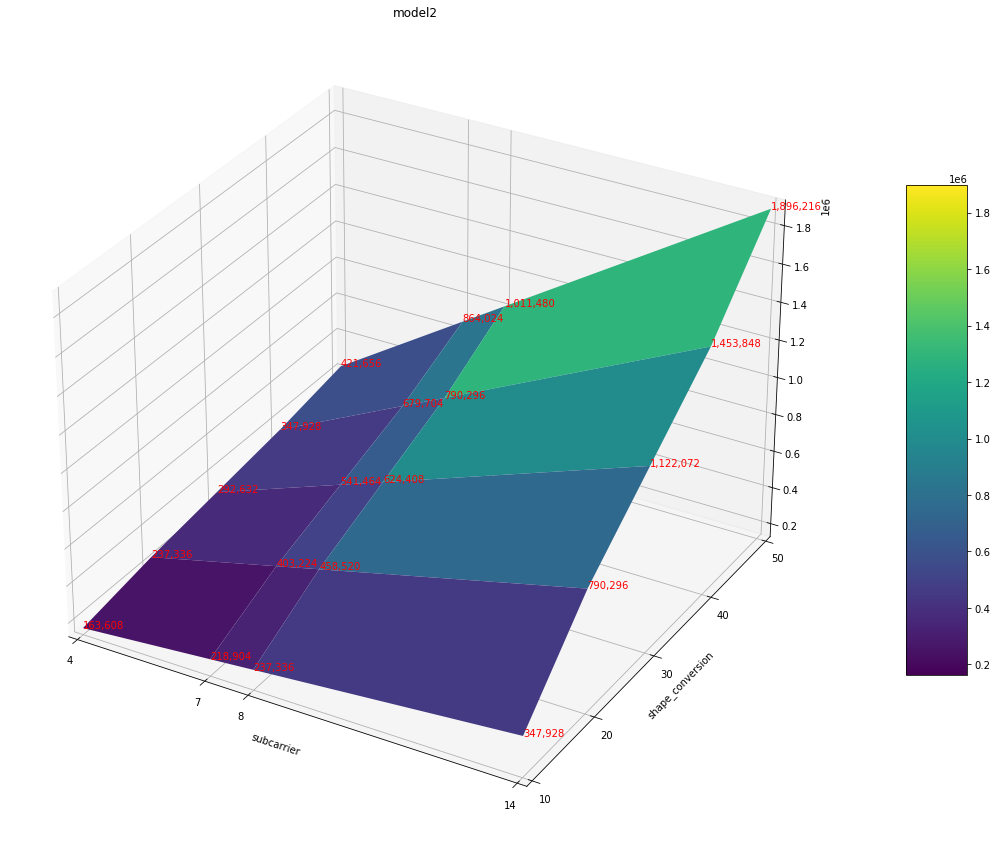

|    | model   |   subcarrier_spacing |   shape_conversion |   tflite_size |   test_result |
|---:|:--------|---------------------:|-------------------:|--------------:|--------------:|
|  0 | model1  |                    4 |                 50 |        803096 |      0.9731   |
|  1 | model1  |                    4 |                 40 |        637208 |      0.99584  |
|  2 | model1  |                    4 |                 30 |        471320 |      0.995234 |
|  3 | model1  |                    4 |                 20 |        388376 |      0.998244 |
|  4 | model1  |                    7 |                 50 |        416024 |      0.996923 |
|  5 | model1  |                    7 |                 40 |        360728 |      0.994633 |
|  6 | model1  |                    7 |                 30 |        305432 |      0.998958 |
|  7 | model1  |                    7 |                 20 |        277784 |      0.992717 |
|  8 | model1  |                    8 |                 50 |        35

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

result = [["model1",4,50,803096,0.9730997085571289],
        ["model1",4,40,637208,0.9958397150039673],
        ["model1",4,30,471320,0.9952337741851807],
        ["model1",4,20,388376,0.9982435703277588],
        ["model1",7,50,416024,0.9969233274459839],
        ["model1",7,40,360728,0.9946329593658447],
        ["model1",7,30,305432,0.9989583492279053],
        ["model1",7,20,277784,0.9927165508270264],
        ["model1",8,50,351512,0.9904592633247375],
        ["model1",8,40,314648,0.995782196521759],
        ["model1",8,30,277784,0.994421243667602],
        ["model1",8,20,259352,0.996249794960022],
        ["model2",4,50,1896216,0.9992532730102539],
        ["model2",4,40,1453848,0.995523989200592],
        ["model2",4,30,1122072,0.9956315755844116],
        ["model2",4,20,790296,0.9925589561462402],
        ["model2",4,10,347928,0.9859961271286011],
        ["model2",7,50,1011480,0.9983510971069336],
        ["model2",7,40,790296,0.9958572387695312],
        ["model2",7,30,624408,0.9963655471801758],
        ["model2",7,20,458520,0.9989920854568481],
        ["model2",7,10,237336,0.9949069023132324],
        ["model2",8,50,864024,0.9973589181900024],
        ["model2",8,40,679704,0.995275616645813],
        ["model2",8,30,541464,0.9945625066757202],
        ["model2",8,20,403224,0.9942002296447754],
        ["model2",8,10,218904,0.9917993545532227],
        ["model2",14,50,421656,0.976747453212738],
        ["model2",14,40,347928,0.996121883392334],
        ["model2",14,30,292632,0.9932632446289062],
        ["model2",14,20,237336,0.9929468631744385],
        ["model2",14,10,163608,0.9922065138816833]]

def draw3Dchart(x, y, z, title, xlabel = "subcarrier", ylabel = "shape_conversion" ):
    fig = plt.figure(figsize=(30,15))
    ax = fig.add_subplot(111, projection='3d')    
    ax.set_zlim(dfMin, dfMax)
    ax.set_xlim(4,14)
    ax.set_ylim(10,50)
    ax.set_xticks(x_list)
    ax.set_yticks(shape_conversion_list2)
    surf = ax.plot_surface(x, y, z, cmap='viridis')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    surf.set_clim(dfMin, dfMax)
    fig.colorbar(surf, shrink=0.6, aspect=8)
    return ax

fieldnames = ["model", "subcarrier_spacing", "shape_conversion", "tflite_size", "test_result"]
df = pd.DataFrame(result, columns=fieldnames)
dfMax = df["tflite_size"].max()
dfMin = df["tflite_size"].min()

df1 = df.where(df["model"]=="model1").dropna()
df2 = df.where(df["model"]=="model2").dropna()

subcarrier_max = 56
subcarrier_spacing_list = [4, 7, 8]
shape_conversion_list = [50, 40, 30, 20]
subcarrier_spacing_list2 = [4, 7, 8, 14]
shape_conversion_list2 = [50, 40, 30, 20, 10]
x_list = subcarrier_max/np.array(subcarrier_spacing_list2)

x_size = len(subcarrier_spacing_list)
y_size = len(shape_conversion_list)
x_np = np.array(subcarrier_max/df1["subcarrier_spacing"]).reshape(x_size,y_size)
y_np = np.array(df1["shape_conversion"]).reshape(x_size,y_size)
z_np = np.array(df1["tflite_size"]).reshape(x_size,y_size)
ax = draw3Dchart(x_np, y_np, z_np, "model1")
for idx, row in df1.iterrows():
    ax.text(subcarrier_max/row['subcarrier_spacing'], row['shape_conversion'], row['tflite_size'], format(int(row['tflite_size']),','), color='red')
plt.show()


x_size = len(subcarrier_spacing_list2)
y_size = len(shape_conversion_list2)
x_np = np.array(subcarrier_max/df2["subcarrier_spacing"]).reshape(x_size,y_size)
y_np = np.array(df2["shape_conversion"]).reshape(x_size,y_size)
z_np = np.array(df2["tflite_size"]).reshape(x_size,y_size)
ax = draw3Dchart(x_np, y_np, z_np, "model2")
for idx, row in df2.iterrows():
    ax.text(subcarrier_max/row['subcarrier_spacing'], row['shape_conversion'], row['tflite_size'], format(int(row['tflite_size']),','), color='red')
plt.show()

print(df.to_markdown())
